In [ ]:
Access token:

2464327753-T3QPmpnffpyjoOPQbYS97UHKr8Zokf46urNqfSf

copy-light
Access token secret:

tL0d6oPCl7kW0RlNxXfIPbx8UcZg9aKtIf3XeRLCMXCLa

copy-light

In [71]:
import tweepy
from textblob import TextBlob
import csv
import pandas as pd

In [72]:
consumer_key = 'Wn02Vkt660TAWh22cGPHgYVVN'
consumer_secret = 'K00OcKr1F8hUYNjd55QEvaAsGkGVeRp95J0v1Wq8QWQGt7g9my'
access_token = '2464327753-T3QPmpnffpyjoOPQbYS97UHKr8Zokf46urNqfSf'
access_token_secret = 'tL0d6oPCl7kW0RlNxXfIPbx8UcZg9aKtIf3XeRLCMXCLa'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [73]:
public_tweets = api.search(q=['Covid','Indonesia'], count = 6, since="2020-03-01")

In [74]:
# all_polarity = 0
# for tweet in public_tweets:
#     data = tweet.text
#     print(tweet.created_at, data)
#     df = pd.DataFrame(eval(str(tweet.text)))
    
#     analysis = TextBlob(tweet.text)
#     an = analysis.translate(from_lang='id', to='en')
#     sentimen = an.sentiment
#     print(sentimen)
#     all_polarity += an.polarity
    
#     print("")

csvFile = open('nyoba.csv','a', encoding='utf-8')
csvWriter = csv.writer(csvFile)
for tweet in tweepy.Cursor(api.search, q= "@Indihome",count=10, #q=Indihome
                          lang='id',
                          since="2020-11-24").items(50):
    print(tweet.created_at, tweet.text, tweet.user.screen_name)
    csvWriter.writerow(["Date", "Tweet", "Screen"])
    csvWriter.writerow([tweet.created_at, tweet.text, tweet.user.screen_name])

2020-12-02 19:12:29 najis banget jaringan @indihome ttackedd
2020-12-02 19:09:44 @_mardial_ @IndiHome Dari tadi pagi udh dm blm ada kabar wkwkw internet down dr kemaren padahal bang Mahfrisa
2020-12-02 19:01:31 Udh 3hari ni sahabat gangguan gmn ya @indihome fariswdnt
2020-12-02 18:52:02 @IndiHome Punten mamank, indihome area pekalongan timur masih trouble? Apa gimana? muhandreardi
2020-12-02 18:44:04 @IndiHome permisi nih ya, ini internet di makassar daerah alauddin, 2 hari kambuh2an nih losnya. Maintenence? Maint… https://t.co/GQ5IDNamC9 zikrullah98
2020-12-02 18:31:42 Min @IndiHome wifi rumah kok mati gini ada gangguan kah? Mohon tindakannya https://t.co/4PU5dJnHzZ takology21
2020-12-02 18:30:49 Halo @IndiHome kenapa malam malam PON nya merah ya? Kan jadi internet nya mati dan saya ga bisa ngerjain tugas dong? ibraditya
2020-12-02 18:29:40 Halo @IndiHome, sudah lebih dari 48 jam nih, sudah lebih dari estimasi. Segera proses keluhan saya di dm ya. andriyayoy
2020-12-02 18:25:22 @_mard

In [75]:
# from textblob.classifiers import NaiveBayesClassifier
# kl = NaiveBayesClassifier()

# import pandas as pd

# df = pd.DataFrame(eval(data))

data = pd.read_csv("nyoba.csv")
data

2020-12-02 19:01:31     Udh 3hari ni sahabat gangguan gmn ya @indihome  \
0    2020-12-02 18:52:02  @IndiHome Punten mamank, indihome area pekalon...   
1    2020-12-02 18:44:04  @IndiHome permisi nih ya, ini internet di maka...   
2    2020-12-02 18:31:42  Min @IndiHome wifi rumah kok mati gini ada gan...   
3    2020-12-02 18:30:49  Halo @IndiHome kenapa malam malam PON nya mera...   
4    2020-12-02 18:29:40  Halo @IndiHome, sudah lebih dari 48 jam nih, s...   
..                   ...                                                ...   
445  2020-12-02 17:20:11  @makanteros @IndiHome Akhirnya pake kuota send...   
446  2020-12-02 17:19:48  @IndiHome assalamu'alaikum kak indihome sering...   
447  2020-12-02 17:19:26  Gua mauuu nontonn bolaaa ntarrr\r\nJangannn be...   
448  2020-12-02 17:17:55  @idpjlstrrr @IndiHome wkwkwk kaga .. emg aku p...   
449  2020-12-02 17:16:54  @IndiHome down lagi? Tidak bisa nyambung ke ja...   

         fariswdnt  
0     muhandreardi  
1      zikrullah98  
2       takology21  
3        ibraditya  
4       andriyayoy  
..             ...  
445   penikmatldr_  
446     nonikarini  
447    IamBatakboy  
448      juprex_13  
449  ramadhangluwe  

[450 rows x 3 columns]

In [77]:
Data_polarity = lambda x: TextBlob(x).sentiment.polarity
Data_subjective = lambda x: TextBlob(x).sentiment.subjectivity
data['Polarity'] = data["Udh 3hari ni sahabat gangguan gmn ya @indihome"].apply(Data_polarity)
data['Subjectivity'] = data["Udh 3hari ni sahabat gangguan gmn ya @indihome"].apply(Data_subjective)
data

2020-12-02 19:01:31     Udh 3hari ni sahabat gangguan gmn ya @indihome  \
0    2020-12-02 18:52:02  @IndiHome Punten mamank, indihome area pekalon...   
1    2020-12-02 18:44:04  @IndiHome permisi nih ya, ini internet di maka...   
2    2020-12-02 18:31:42  Min @IndiHome wifi rumah kok mati gini ada gan...   
3    2020-12-02 18:30:49  Halo @IndiHome kenapa malam malam PON nya mera...   
4    2020-12-02 18:29:40  Halo @IndiHome, sudah lebih dari 48 jam nih, s...   
..                   ...                                                ...   
445  2020-12-02 17:20:11  @makanteros @IndiHome Akhirnya pake kuota send...   
446  2020-12-02 17:19:48  @IndiHome assalamu'alaikum kak indihome sering...   
447  2020-12-02 17:19:26  Gua mauuu nontonn bolaaa ntarrr\r\nJangannn be...   
448  2020-12-02 17:17:55  @idpjlstrrr @IndiHome wkwkwk kaga .. emg aku p...   
449  2020-12-02 17:16:54  @IndiHome down lagi? Tidak bisa nyambung ke ja...   

         fariswdnt  Polarity  Subjectivity  
0     muhandreardi -0.200000      0.200000  
1      zikrullah98  0.000000      0.000000  
2       takology21  0.000000      0.000000  
3        ibraditya  0.000000      0.000000  
4       andriyayoy  0.000000      0.000000  
..             ...       ...           ...  
445   penikmatldr_  0.000000      0.000000  
446     nonikarini  0.000000      0.000000  
447    IamBatakboy  0.000000      0.000000  
448      juprex_13  0.000000      0.000000  
449  ramadhangluwe -0.155556      0.288889  

[450 rows x 5 columns]

In [78]:
#untuk menambahkan sentimen positif, negatif / netral dari polarity yg sudah dihitung
def Sentimen(data):
    if data['Polarity'] >= 0:
        val = 'Positif/Netral'
    elif data['Polarity'] < 0:
        val = 'Negatif'
    return val
        
data['Sentimen'] = data.apply(Sentimen, axis=1)

data.to_csv("DataIndihome_DenganSentimen1.csv", index = False) #menyimpan ke file csv baru

In [79]:
#dibagian ini dari data yg sdh memiliki sentimen tadi dibuat visual nya dalam bentuk Grafik
import matplotlib.pyplot as plt
import seaborn as sns

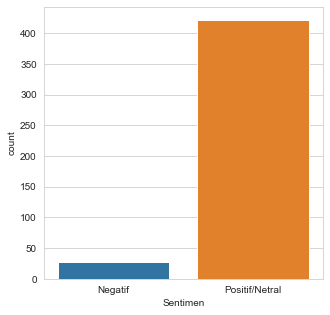

In [80]:
plt.figure(figsize=(5,5))
sns.set_style('whitegrid')
ax = sns.countplot(x = 'Sentimen', data=data)

In [91]:

from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
import codecs
import re,string
stop = set(stopwords.words('indonesian')) 

In [104]:
def praproses(teks):
    teks = re.sub(r'http\S+','',teks)
    teks = hapus_tanda(teks)
    teks = re.sub(r'#([^\s]+)', r'\1', teks) #hapus #tagger
    teks = re.sub(r'\w*\d\w*', '',teks).strip()#hapus angka dan angka yang berada dalam string
    teks = hapus_katadouble(teks)#hapus repetisi karakter
    teks = teks.lower() #ubah jadi lower case
    teks = to_kbbi(teks)
    return teks

def hapus_tanda(teks): 
    tanda_baca = set(string.punctuation)
    tanda_baca.update(['…'])
    teks = ''.join(ch for ch in teks if ch not in tanda_baca)
    return teks

def hapus_katadouble(s): 
    #look for 2 or more repetitions of character and replace with the character itself
    pattern = re.compile(r"(.)\1{1,}", re.DOTALL)
    return pattern.sub(r"\1\1", s)

def kbbi(kata): # penyeragaman kata berdasarkan kbbi 
	#kbba = [kamus.strip('\n').strip('\r') for kamus in open('kamus\\kbba.txt')]
	kamus_kata = [kamus.strip('\n').strip('\r') for kamus in open('kbba.txt')]
	#ubah list menjadi dictionary 
	dic = {}
	for i in kamus_kata: 
		(key, val) = i.split('\t')
		dic[str(key)] = val
	#kbbi cocokan 
	final_string = ' '.join(str(dic.get(word, word)) for word in kata).split()
	return final_string

def to_kbbi(teks):
    tek = teks.split()
    tek = kbbi(tek)
    return tek

#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)
    
#Removing the noisy text
def denoise_text(text):
#     text = strip_html(text)
#     text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    text = praproses(text)
    return text

#Apply function on review column
data["Udh 3hari ni sahabat gangguan gmn ya @indihome"]=data["Udh 3hari ni sahabat gangguan gmn ya @indihome"].apply(denoise_text)


In [107]:
data['Udh 3hari ni sahabat gangguan gmn ya @indihome']

0      [indihome, punten, mamank, indihome, area, pek...
1      [indihome, permisi, ini, iya, internet, makass...
2      [min, indihome, wifi, rumah, mati, begini, gan...
3      [halo, indihome, malam, malam, pon, nya, merah...
4      [halo, indihome, jam, ini, estimasi, proses, k...
                             ...                        
445       [makanteros, indihome, pakai, kuota, sendiri😶]
446    [indihome, assalamualaikum, kak, indihome, gan...
447    [saya, mauu, nontonn, bolaa, ntarr, jangann, b...
448    [idpjlstrr, indihome, wkwkwk, tidak, memang, p...
449                 [indihome, down, nyambung, jaringan]
Name: Udh 3hari ni sahabat gangguan gmn ya @indihome, Length: 450, dtype: object

In [109]:
from textblob.classifiers import NaiveBayesClassifier

# # for tweet in data["Udh 3hari ni sahabat gangguan gmn ya @indihome"].items():
# #     kl = NaiveBayesClassifier(tweet)
# # return tweet
# from sklearn.feature_extraction.text import CountVectorizer
# # Define the cleaning pipeline we defined earlier
# vectorizer = CountVectorizer(analyzer = denoise_text)
# tweets_countvectorizer = CountVectorizer(analyzer = denoise_text, dtype = 'uint8').fit_transform(
#     data["Udh 3hari ni sahabat gangguan gmn ya @indihome"]).toarray()

In [116]:
#defining a pipeline to clean up all the messages 
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [117]:
tweets_df_clean = data['Udh 3hari ni sahabat gangguan gmn ya @indihome'].apply(message_cleaning)

In [118]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning)
tweets_countvectorizer = CountVectorizer(analyzer = message_cleaning, dtype = 'uint8').fit_transform(
    data['Udh 3hari ni sahabat gangguan gmn ya @indihome']).toarray()

In [119]:
X = tweets_countvectorizer

In [120]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [121]:
y = data['Sentimen']

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [123]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [124]:
from sklearn.metrics import classification_report, confusion_matrix

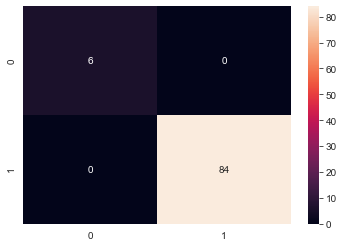

In [125]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [126]:
print(classification_report(y_test, y_predict_test))

                precision    recall  f1-score   support

       Negatif       1.00      1.00      1.00         6
Positif/Netral       1.00      1.00      1.00        84

      accuracy                           1.00        90
     macro avg       1.00      1.00      1.00        90
  weighted avg       1.00      1.00      1.00        90

